<a href="https://colab.research.google.com/github/djhsgfjk/collab/blob/main/Lab2_%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%BE%D0%B2_%D1%81%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from PIL import Image
from pylab import *
import random as rd

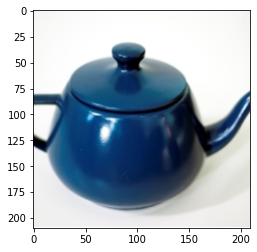

In [5]:
image1 = np.array(Image.open('/first.png'), dtype=int)
figure()
imshow(image1)
show()

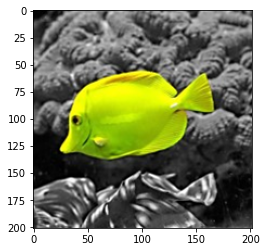

In [6]:
image2 = np.array(Image.open('/second.png'), dtype=int)
figure()
imshow(image2)
show()

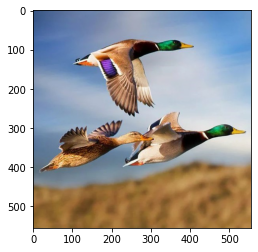

In [7]:
image3 = np.array(Image.open('/third.jpg'), dtype=int)
figure()
imshow(image3)
show()


# 1. Сегментация с помощью бинаризация полутонового изображения методом Оцу
https://habr.com/ru/post/112079/

Переводим изображение в полутоновое

In [8]:
def make_halftone_image(image):
  width = image.shape[0]
  height = image.shape[1]

  halftoneImage = np.zeros(width*height, dtype=int)
  halftoneImage.shape = (width, height)
  for i in range(width):
      for j in range(height):
          halftoneImage[i][j] = mean(image[i,j,:])
  
  return halftoneImage

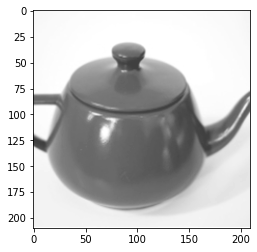

In [9]:
halftoneImage1 = make_halftone_image(image1)
figure()
imshow(halftoneImage1, cmap='gray', vmin=0, vmax=255)
show()

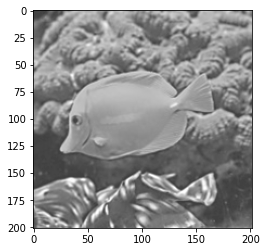

In [10]:
halftoneImage2 = make_halftone_image(image2)
figure()
imshow(halftoneImage2, cmap='gray', vmin=0, vmax=255)
show()

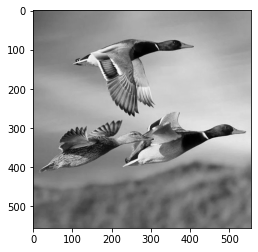

In [11]:
halftoneImage3 = make_halftone_image(image3)
figure()
imshow(halftoneImage3, cmap='gray', vmin=0, vmax=255)
show()

Находим гистограмму изображения

In [12]:
def draw_histogram(image):
  x = np.array(range(0, 256), dtype=int)
  y = np.zeros(256, dtype=int)
  width = image.shape[0]
  height = image.shape[1]

  for i in range(0, width):
    for j in range(0, height):
      y[image[i, j]] += 1

  return x, y

<BarContainer object of 256 artists>

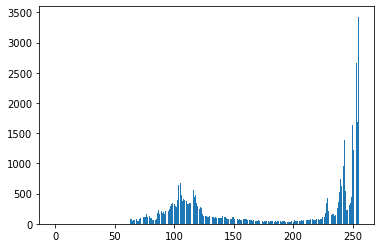

In [13]:
x1, y1 = draw_histogram(halftoneImage1)
figure()
bar(x1,y1)

<BarContainer object of 256 artists>

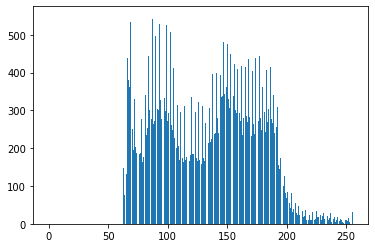

In [14]:
x2, y2 = draw_histogram(halftoneImage2)
figure()
bar(x2,y2)

<BarContainer object of 256 artists>

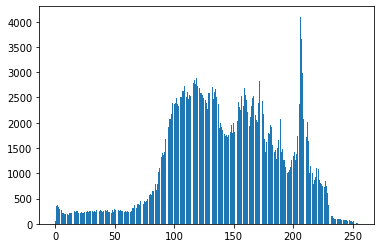

In [15]:
x3, y3 = draw_histogram(halftoneImage3)
figure()
bar(x3,y3)

Вычисляем порог T

In [16]:
def otsu_Threshold(hist):
  min = 0;
  max = 0;
 
  for i in range(1, hist.size):
    value = hist[i];
    if value < min:
      min = i
    if value > max:
      max = i

  # Введем два вспомогательных числа:
  m = 0; # m - сумма высот всех бинов, домноженных на положение их середины
  n = 0; # n - сумма высот всех бинов
  for t in range(0, max - min + 1):
    m += t * hist[t]
    n += hist[t]
 
  maxSigma = -1; # Максимальное значение межклассовой дисперсии
  threshold = 0; # Порог, соответствующий maxSigma
 
  alpha1 = 0; # Сумма высот всех бинов для класса 1
  beta1 = 0; # Сумма высот всех бинов для класса 1, домноженных на положение их середины
 
  # Переменная alpha2 не нужна, т.к. она равна m - alpha1
  # Переменная beta2 не нужна, т.к. она равна n - alpha1
 
  # t пробегается по всем возможным значениям порога
  for t in range(0, max - min + 1):
    alpha1 += t * hist[t]
    beta1 += hist[t]
 
    # Считаем вероятность класса 1.
    w1 = beta1 / n
    # w2 тоже не нужна, т.к. она равна 1 - w1
 
    # a = a1 - a2, где a1, a2 - средние арифметические для классов 1 и 2
    a = (alpha1 / beta1) - ((m - alpha1) / (n - beta1))
    
    # Наконец, считаем sigma
    sigma = w1 * (1 - w1) * (a**2)
 
    # Если sigma больше текущей максимальной, то обновляем maxSigma и порог
    if sigma > maxSigma:
      maxSigma = sigma
      threshold = t

  # Не забудем, что порог отсчитывался от min, а не от нуля
  threshold += min;
 
  return threshold

177


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


<BarContainer object of 1 artists>

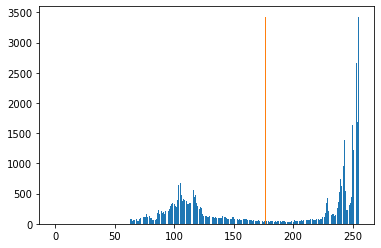

In [17]:
threshold1 = otsu_Threshold(y1)
print(threshold1)
figure()
bar(x1,y1)
bar(threshold1, np.amax(y1))


127


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


<BarContainer object of 1 artists>

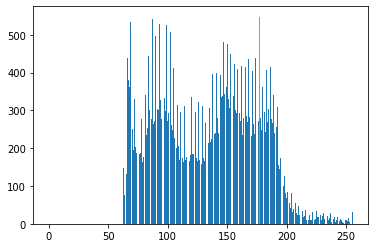

In [18]:
threshold2 = otsu_Threshold(y2)
print(threshold2)
figure()
bar(x2,y2)
bar(threshold1, np.amax(y2))

143


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


<BarContainer object of 1 artists>

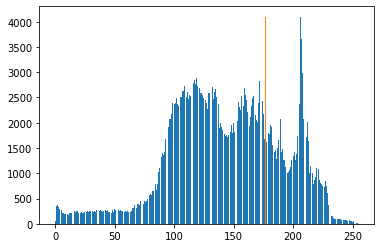

In [19]:
threshold3 = otsu_Threshold(y3)
print(threshold3)
figure()
bar(x3,y3)
bar(threshold1, np.amax(y3))

Получим бинарное изображение

In [20]:
def otsu_Binarization(image, threshold):
  width = image.shape[0]
  height = image.shape[1]
  
  newImage = np.zeros(width*height, dtype=int)
  newImage.shape = (width, height)
  
  for x in range(0, width):
    for y in range(0, height):
      if image[x, y] > threshold:
        newImage[x, y] = 255
        
  return newImage

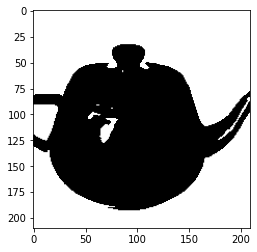

In [21]:
binaryImage1 = otsu_Binarization(halftoneImage1, threshold1)
figure()
imshow(binaryImage1, cmap='gray', vmin=0, vmax=255)
show()

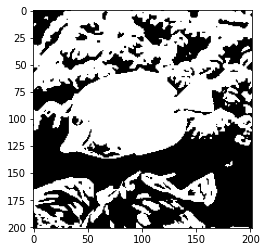

In [22]:
binaryImage2 = otsu_Binarization(halftoneImage2, threshold2)
figure()
imshow(binaryImage2, cmap='gray', vmin=0, vmax=255)
show()

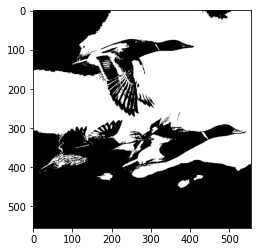

In [23]:
binaryImage3 = otsu_Binarization(halftoneImage3, threshold3)
figure()
imshow(binaryImage3, cmap='gray', vmin=0, vmax=255)
show()

Удалим шумы типа «соль и перец»

In [24]:
def solt_and_pepper_filtering(image):
  width = image.shape[0]
  height = image.shape[1]

  for i in range(1, width-1):
      for j in range(1, height-1):
        val = image[i-1,j-1]
        if all([val0 == val for val0 in [image[i, j-1], image[i-1, j], image[i+1, j+1], image[i, j+1], image[i+1, j], image[i-1, j+1], image[i+1, j-1]]]):
          image[i,j] = val

  val = image[0,1]
  if all([val0 == val for val0 in [image[0, 1], image[1, 1]]]):
    image[0,0] = val

  val = image[width-2,0]
  if all([val0 == val for val0 in [image[width-2, 1], image[width-1, 1]]]):
    image[width-1, 0] = val

  val = image[0,height-2]
  if all([val0 == val for val0 in [image[1, height-2], image[1, height-1]]]):
    image[0, height-1] = val

  val = image[width-1,height-2]
  if all([val0 == val for val0 in [image[width-2, height-2], image[width-2, height-1]]]):
    image[width-1, height-1] = val

  for i in range(1, width-1):
    for j, k in [[[0, 1], [height-1, -1]]]:
      val = image[i-1,j]
      if all([val0 == val for val0 in [image[i-1, j+k], image[i, j+k], image[i+1, j+k], image[i+1, j]]]):
        image[i,j] = val

  for i, k in [[0, 1], [width-1, -1]]:
    for j in range(1, height-1):
      val = image[i,j-1]
      if all([val0 == val for val0 in [image[i+k, j-1], image[i+k, j], image[i+k, j+1], image[i, j+1]]]):
        image[i,j] = val
      
  return image 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


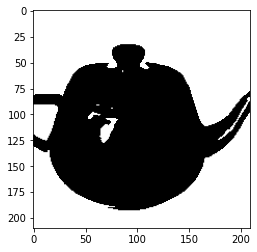

In [25]:
cleanImage1 = solt_and_pepper_filtering(binaryImage1)
figure()
imshow(cleanImage1, cmap='gray', vmin=0, vmax=255)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


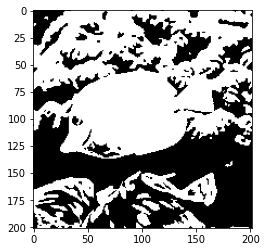

In [26]:
cleanImage2 = solt_and_pepper_filtering(binaryImage2)
figure()
imshow(cleanImage2, cmap='gray', vmin=0, vmax=255)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


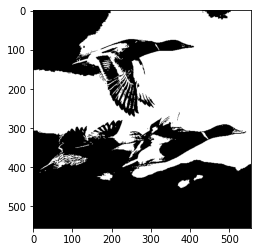

In [27]:
cleanImage3 = solt_and_pepper_filtering(binaryImage3)
figure()
imshow(cleanImage3, cmap='gray', vmin=0, vmax=255)

Выделение сегментов путем «выращивания семян»

In [54]:
class Region():
  def __init__(self, seed):
    self.X = seed
    self.S2 = 0.0001
    self.N = 1

  def T(self, seed):
    return abs(self.S2 - self.S2**2 + (seed - self.X)**2 + self.N*(((self.N*self.X + seed)/(self.N+1)-self.X)**2))
    #return np.sqrt(((((self.N-1)*self.N)/(self.N+1))*(seed-self.X)**2)/self.S2)
  
  def update(self, seed):
    X_old = self.X
    self.X = (self.N*self.X + seed)/(self.N+1)
    self.S2 = self.S2**2 + (seed - X_old)**2 + self.N*((self.X-X_old)**2)
    if self.S2 == 0:
      self.S2 = 0.0001
    self.N += 1

  def check(self, seed, sigma):
      T = self.T(seed)
      if T <= sigma:
        self.update(seed)
        return True
      else:
        return False
  

def region_growing(image, x0, y0, sigma):
  width = image.shape[0]
  height = image.shape[1]

  set_to_check = np.zeros((width+2, height+2), dtype=int)
  set_to_check[x0+1, y0+1] = 2
  set_to_check[0, :] = 2
  set_to_check[width+1, :] = 2
  set_to_check[:, 0] = 2
  set_to_check[:, height+1] = 2

  R = 1

  segmentedImage = np.zeros((width, height), dtype=int)
  segmentedImage[x0, y0] = R

  regions = [Region(image[x0, y0])]
  now = []
  next = []
  next1 = []
  for i in range(-1, 2):
    for j in range(-1, 2):
      now.append([x0+i, y0+j])
      set_to_check[x0+1+i, y0+1+j] = 1


  end = 2*(width+2)*(height+2)
  while np.sum(set_to_check) < end:
    #print("left - ", (end - np.sum(set_to_check))//2)
    if len(now) == 0:
      if len(next) > 0:
        for b in range(len(next)):
          x, y = next[b]
          if set_to_check[x+1, y+1] == 2:
            for c in range(b+1, len(next)):
              x1, y1 = next[c]
              if set_to_check[x1+1, y1+1] < 2:
                set_to_check[x1+1, y1+1] = 0
                next1.append([x1, y1])
            break
        next = next1
        next1.clear()  
      else:
        new_xy = np.argwhere(set_to_check[1:width+1, 1:height+1] == 0)[0] - 1
        x, y = new_xy
      
      regions.append(Region(image[x, y]))
      R = len(regions)
      segmentedImage[x, y] = R
      set_to_check[x+1, y+1] = 2
      for i in range(-1, 2):
        for j in range(-1, 2):
          if set_to_check[x+1+i, y+1+j] == 0:
            now.append([x+i, y+j])
            set_to_check[x+1+i, y+1+j] = 1

    a = 0
    while a < len(now):
      x, y = now[a]
      if regions[R-1].check(image[x, y], sigma):
        segmentedImage[x, y] = R
        set_to_check[x+1, y+1] = 2
        for i in range(-1, 2):
          for j in range(-1, 2):
            if set_to_check[x+1+i, y+1+j] == 0:
              now.append([x+i, y+j])
              set_to_check[x+1+i, y+1+j] = 1
      else:
        set_to_check[x+1, y+1] = 0
        next.append([x, y])
      a += 1
    now.clear()

  n = len(regions)
  segmentedImage -= 1
  newImage = np.zeros((width, height, 3), dtype=int)
  colors = [[rd.randint(0, 255), rd.randint(0, 255), rd.randint(0, 255)] for i in range(n+1)]
  for i in range(width):
    for j in range(height):
      newImage[i, j, :] = colors[segmentedImage[i, j]]


  return newImage, n

17


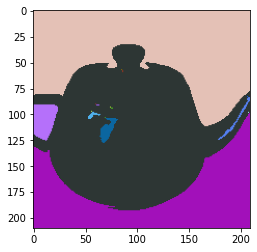

In [55]:
segmentedImage1, n = region_growing(cleanImage1, 120, 150, 1)
print(n)
figure()
imshow(segmentedImage1, vmin=0, vmax=255)

228


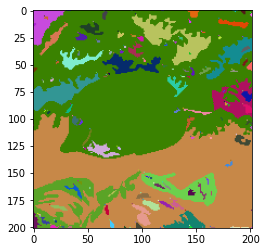

In [56]:
segmentedImage2, n = region_growing(cleanImage2, 150, 75, 1)
print(n)
figure()
imshow(segmentedImage2, vmin=0, vmax=255)

377


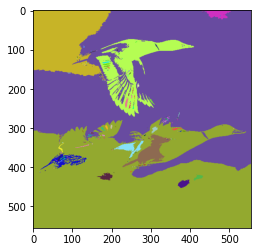

In [57]:
segmentedImage3, n = region_growing(cleanImage3, 100, 100, 1)
print(n)
figure()
imshow(segmentedImage3, vmin=0, vmax=255)

# 2.	Используем комбинацию гистограммного метода и алгоритма «выращивания семян» для сегментации полутонового изображения. 

Гистограммный метод сегментации. В качестве кластеров выбираются интервалы значений между точками локального минимума.

Находим локальные минимумы в гистограмме.

In [32]:
def local_mins(hist, n):
  i = 1
  mins = [0]
  while (i < len(hist)-1):
    while (i < len(hist)-1 and hist[i+1] >= hist[i]):
      i += 1
    while (i < len(hist)-1 and hist[i+1] <= hist[i]):
      i += 1
    if i//n != mins[-1]//n:  
      mins.append(i)
    else:
      if hist[i] < hist[mins[-1]]:
        mins[-1] = i
    i += 1
  if (mins[-1] != 255):
    mins.append(255)

  return mins[1:]

13
[69, 84, 102, 125, 139, 154, 175, 190, 194, 208, 235, 246, 255]


<BarContainer object of 13 artists>

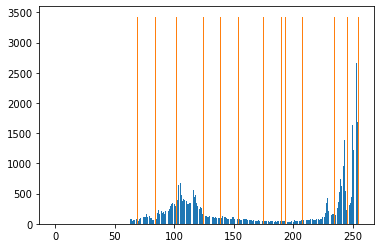

In [33]:
min1 = local_mins(y1, 16)
print(len(min1))
print(min1)
figure()
bar(x1,y1)
bar(min1, np.amax(y1))

13
[64, 82, 110, 113, 128, 158, 170, 190, 205, 223, 238, 248, 255]


<BarContainer object of 13 artists>

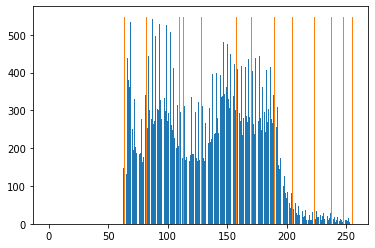

In [34]:
min2 = local_mins(y2, 16)
print(len(min2))
print(min2)
figure()
bar(x2,y2)
bar(min2, np.amax(y2))

15
[23, 47, 62, 68, 81, 104, 112, 143, 145, 163, 186, 195, 217, 235, 255]


<BarContainer object of 15 artists>

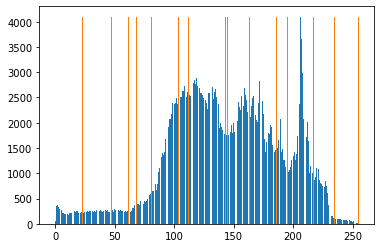

In [35]:
min3 = local_mins(y3, 16)
print(len(min3))
print(min3)
figure()
bar(x3,y3)
bar(min3, np.amax(y3))

Получаем новое полутоное изображение, разделенное на сегменты

In [36]:
def hist_method(min, image):
  tones =  np.arange(len(min), dtype=int) * 255 // (len(min)-1)

  width = image.shape[0]
  height = image.shape[1]
  
  newImage = np.zeros(width*height, dtype=int)
  newImage.shape = (width, height)
  
  for x in range(0, width):
    for y in range(0, height):
      for i in range(0, len(min)):
        if image[x, y] <= min[i]:
          newImage[x, y] = tones[i]
          break
        
  return newImage

<BarContainer object of 256 artists>

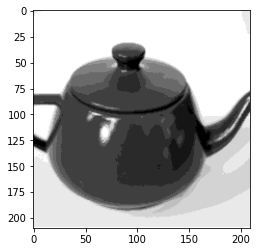

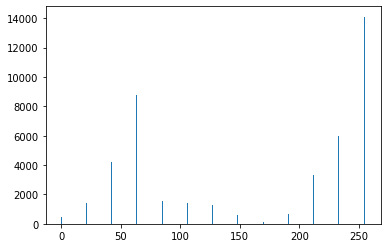

In [37]:
halftoneHistImage1 = hist_method(min1, halftoneImage1)
figure()
imshow(halftoneHistImage1, cmap='gray', vmin=0, vmax=255)

x11, y11 = draw_histogram(halftoneHistImage1)
figure()
bar(x11,y11)

<BarContainer object of 256 artists>

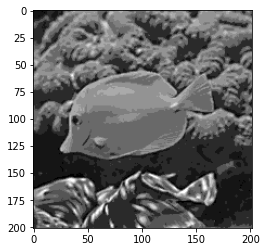

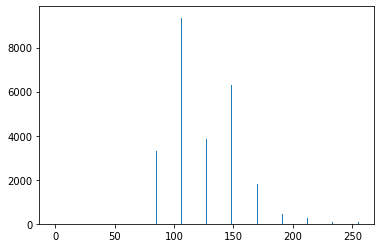

In [39]:
halftoneHistImage2 = hist_method(min2, halftoneImage2)
figure()
imshow(halftoneHistImage2, cmap='gray', vmin=0, vmax=255)

x22, y22 = draw_histogram(halftoneHistImage2)
figure()
bar(x22,y22)

<BarContainer object of 256 artists>

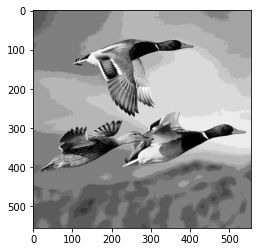

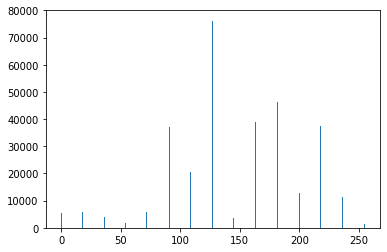

In [40]:
halftoneHistImage3 = hist_method(min3, halftoneImage3)
figure()
imshow(halftoneHistImage3, cmap='gray', vmin=0, vmax=255)

x33, y33 = draw_histogram(halftoneHistImage3)
figure()
bar(x33,y33)

Вычислим градиенты полученных полутоновых изображений



In [41]:
def get_gradient(image):
  width = image.shape[0]
  height = image.shape[1]

  imageCopy = np.zeros((width+1, height+1), dtype=int)

  for i in range(width):
    for j in range(height):
      imageCopy[i+1, j+1] = image[i, j]

  gradient = np.zeros((width+1, height+1, 2), dtype=float)

  for i in range(1, width):
    for j in range(1, height):
      gradient[i, j, 0] = (imageCopy[i+1, j]-imageCopy[i-1, j] + imageCopy[i+1, j-1]-imageCopy[i-1, j-1] + imageCopy[i+1, j+1]-imageCopy[i-1, j+1])/6
      gradient[i, j, 1] = (imageCopy[i, j+1]-imageCopy[i, j-1] + imageCopy[i-1, j+1]-imageCopy[i-1, j-1] + imageCopy[i+1, j+1]-imageCopy[i+1, j-1])/6

  return gradient[1:width+1, 1:height+1, :]
  

In [42]:
gradient1 = get_gradient(halftoneHistImage1)
gradient2 = get_gradient(halftoneHistImage2)
gradient3 = get_gradient(halftoneHistImage3)

print(gradient1.shape)
print(gradient1)

(210, 209, 2)
[[[ 77.66666667  77.66666667]
  [116.5          0.        ]
  [116.5          0.        ]
  ...
  [116.5          0.        ]
  [116.5          0.        ]
  [  0.           0.        ]]

 [[  0.         116.5       ]
  [  0.           0.        ]
  [  0.           0.        ]
  ...
  [  0.           0.        ]
  [  0.           0.        ]
  [  0.           0.        ]]

 [[  0.         116.5       ]
  [  3.66666667   3.66666667]
  [  7.33333333   3.66666667]
  ...
  [  0.           0.        ]
  [  0.           0.        ]
  [  0.           0.        ]]

 ...

 [[  0.         116.5       ]
  [  0.           0.        ]
  [  0.           0.        ]
  ...
  [  0.           0.        ]
  [  0.           0.        ]
  [  0.           0.        ]]

 [[  7.33333333 120.16666667]
  [ 11.           0.        ]
  [ 11.           0.        ]
  ...
  [ 11.           0.        ]
  [ 11.           0.        ]
  [  0.           0.        ]]

 [[  0.           0.        ]
  [  0.   

Вычислим стоимость градиентов для использования в алгоритме выращивания семян

In [43]:
def gradient_cost(gradient):
  width = gradient.shape[0]
  height = gradient.shape[1]

  gradient_cost = np.zeros((width, height), dtype=float)
  for i in range(width):
    for j in range(height):
      gradient_cost[i, j] = np.sqrt(gradient[i, j, 0]**2 + gradient[i, j, 1]**2)

  max = gradient_cost.max()
  gradient_cost /= max

  return gradient_cost

In [44]:
gradient_cost1 = gradient_cost(gradient1)
gradient_cost2 = gradient_cost(gradient2)
gradient_cost3 = gradient_cost(gradient3)

print(gradient_cost1)

[[0.86111264 0.91334788 0.91334788 ... 0.91334788 0.91334788 0.        ]
 [0.91334788 0.         0.         ... 0.         0.         0.        ]
 [0.91334788 0.04065339 0.06427865 ... 0.         0.         0.        ]
 ...
 [0.91334788 0.         0.         ... 0.         0.         0.        ]
 [0.94384682 0.08623886 0.08623886 ... 0.08623886 0.08623886 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Используем алгоритм выращивания семян, используемый градиант полутонового изображения

800


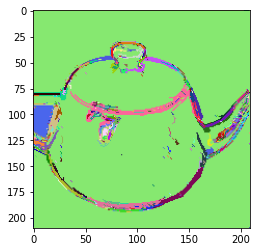

In [58]:
segmentedImage11, n = region_growing(gradient_cost1, 150, 100, 0.01)
print(n)
figure()
imshow(segmentedImage11, vmin=0, vmax=255)

2794


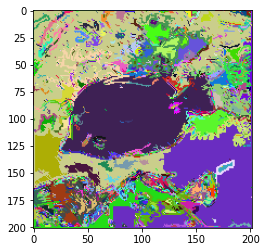

In [59]:
segmentedImage22, n = region_growing(gradient_cost2, 100, 90, 0.01)
print(n)
figure()
imshow(segmentedImage22, vmin=0, vmax=255)

6801


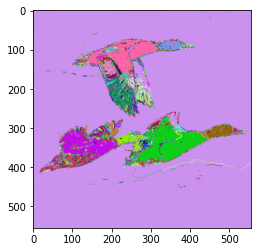

In [60]:
segmentedImage33, n = region_growing(gradient_cost3, 100, 100, 0.01)
print(n)
figure()
imshow(segmentedImage33, vmin=0, vmax=255)